# LinkedIn Data Analyst Job Listings in Canada

This notebook provides a step by step analysis of Data Analyst Job listings in USA posted on LinkedIn

## Data Exploration & Cleaning

### Setup and Data Loading

In [1]:
import pandas as pd

# Loading the dataset CSV file
df = pd.read_csv('../data/linkedin-jobs-usa.csv')

# Exploring the dataset
print(df.head(5))


print(df.info()) 
print(df.describe())  
print(df.columns) 

# Checking data info and missing values
df.isnull().sum()

                            title                   company  \
0  Data Analyst - Recent Graduate                    PayPal   
1  Data Analyst - Recent Graduate                    PayPal   
2                    Data Analyst                    PayPal   
3                    Data Analyst                    PayPal   
4        Entry-Level Data Analyst  The Federal Savings Bank   

                                         description onsite_remote salary  \
0  At PayPal (NASDAQ: PYPL), we believe that ever...        onsite    NaN   
1  At PayPal (NASDAQ: PYPL), we believe that ever...        onsite    NaN   
2  At PayPal (NASDAQ: PYPL), we believe that ever...        onsite    NaN   
3  At PayPal (NASDAQ: PYPL), we believe that ever...        onsite    NaN   
4  The Federal Savings Bank, a national bank and ...        onsite    NaN   

                     location  \
0  Buffalo-Niagara Falls Area   
1                San Jose, CA   
2        Texas, United States   
3     Illinois, United Sta

title               0
company             0
description         0
onsite_remote       0
salary           1916
location            0
criteria            0
posted_date         0
link                0
dtype: int64

In [5]:
#Removing duplicates
import pandas as pd

df = pd.read_csv('../data/linkedin-jobs-usa.csv')
df.drop_duplicates(inplace=True)

#Filling salary column with 'Not Specified'
df['salary'] = df['salary'].fillna('Not Specified')
df.head(5)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,Not Specified,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17,https://www.linkedin.com/jobs/view/entry-level...


## Feature Engineering

In [6]:
#Categorizing job titles into broader roles (e.g., "Data Analyst", "Business Analyst")
import pandas as pd

def categorize_job_title(title):
    # Convert title to lowercase for case-insensitive matching
    title = title.lower().strip()
    
    # Defining categorization rules 
    if 'data scientist' in title or 'machine learning analyst' in title:
        return 'Data Scientist'
    elif 'data engineer' in title or 'data engineering analyst' in title:
        return 'Data Engineer'
    elif 'analytics engineer' in title or 'data analytics engineer' in title:
        return 'Analytics Engineer'
    elif 'bi analyst' in title or 'business intelligence analyst' in title or 'bi specialist' in title:
        return 'Business Intelligence Analyst'
    elif 'data analyst' in title or 'analyst, data' in title or 'data analytics specialist' in title or 'data insights analyst' in title:
        return 'Data Analyst'
    elif 'business analyst' in title or 'business data analyst' in title:
        return 'Business Analyst'
    elif 'reporting analyst' in title or 'report analyst' in title or 'data reporting specialist' in title:
        return 'Reporting Analyst'
    elif 'financial data analyst' in title or 'finance analyst' in title:
        return 'Financial Analyst'
    elif 'operations data analyst' in title or 'operational analyst' in title:
        return 'Operations Analyst'
    elif 'marketing data analyst' in title or 'marketing analytics specialist' in title:
        return 'Marketing Analyst'
    elif 'product data analyst' in title or 'product analytics specialist' in title:
        return 'Product Analyst'
    elif 'risk data analyst' in title or 'risk analytics specialist' in title:
        return 'Risk Analyst'
    elif 'hr data analyst' in title or 'people analytics specialist' in title:
        return 'HR Analyst'
    elif 'research data analyst' in title or 'data research specialist' in title:
        return 'Research Analyst'
    elif 'systems data analyst' in title or 'it data analyst' in title:
        return 'Systems Analyst'
    elif 'analyst' in title or 'analytics' in title:
        return 'Other Analyst'
    else:
        return 'Non-Analyst'

# Applying the function to the DataFrame
df['job_category'] = df['title'].apply(categorize_job_title)



# Displaying the distribution of job categories
print(df['job_category'].value_counts())

#Extracting years of experience from job description
df['experience_years'] = df['description'].str.extract(r'(\d+)\s+years').astype(float)
df.head(15)

job_category
Data Analyst     2751
Other Analyst      94
Name: count, dtype: int64


,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,job_category,experience_years
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...,Data Analyst,20.0
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...,Data Analyst,20.0
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...,Data Analyst,20.0
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...,Data Analyst,20.0
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,Not Specified,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17,https://www.linkedin.com/jobs/view/entry-level...,Data Analyst,2.0
5,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,Greater Scranton Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...,Data Analyst,20.0
6,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,"Tennessee, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...,Data Analyst,20.0
7,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,"Indiana, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...,Data Analyst,20.0
8,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"$100,000.00\r\n -\r\n $1...","Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,https://www.linkedin.com/jobs/view/data-analys...,Data Analyst,NaN
9,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,Not Specified,"Wisconsin, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...,Data Analyst,20.0


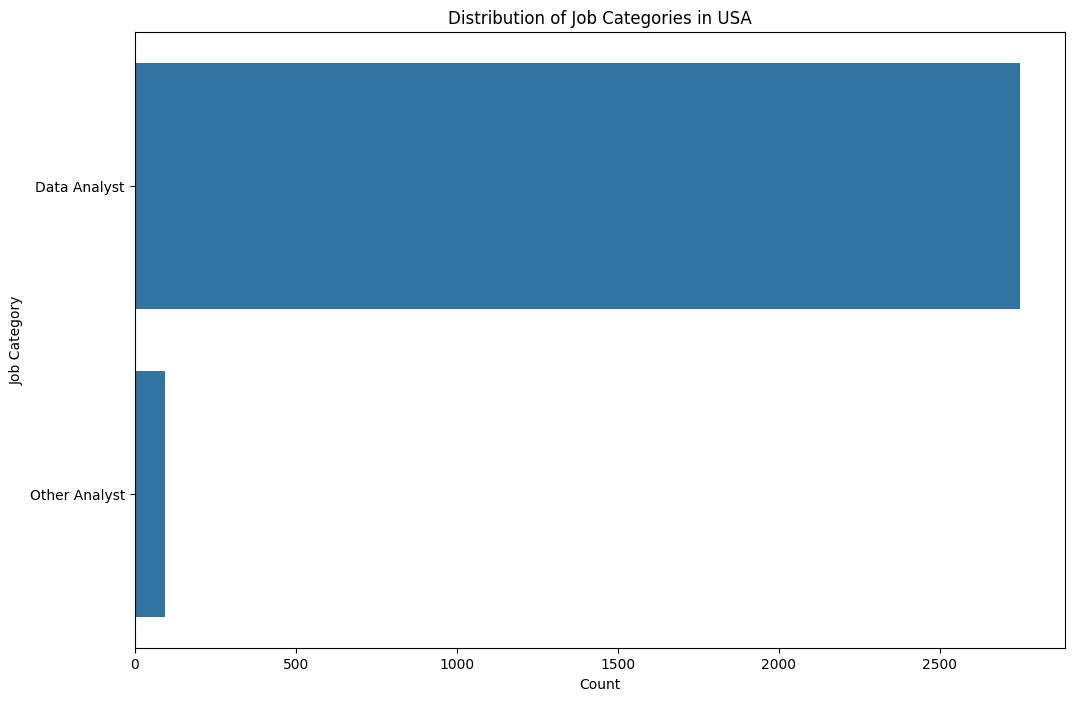

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='job_category', order=df['job_category'].value_counts().index)
plt.title('Distribution of Job Categories in USA')
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.show()

### More Preprocessing of "Experience_years"

In [ ]:
import re

# Preprocessing the description column
df['description_cleaned'] = df['description'].str.lower().str.strip()


# Defining a comprehensive regex pattern
experience_pattern = r'(?:(?:minimum|min\.?|at least|over|more than)\s*)?(\d+)\s*(?:[-–—to]+\s*(\d+))?\s*(?:\+)?\s*years?(?:\s*(?:of)?\s*experience)?'


# Extracting experience data using the regex pattern
experience_data = df['description_cleaned'].str.extract(experience_pattern)

# Creating new columns for minimum and maximum experience
df['experience_min'] = experience_data[0].astype(float) 
df['experience_max'] = experience_data[1].astype(float)  


# Display a sample of the results
print(df[['description', 'experience_min', 'experience_max']].head(10))

                                         description  experience_min  \
0  At PayPal (NASDAQ: PYPL), we believe that ever...            20.0   
1  At PayPal (NASDAQ: PYPL), we believe that ever...            20.0   
2  At PayPal (NASDAQ: PYPL), we believe that ever...            20.0   
3  At PayPal (NASDAQ: PYPL), we believe that ever...            20.0   
4  The Federal Savings Bank, a national bank and ...             1.0   
5  At PayPal (NASDAQ: PYPL), we believe that ever...            20.0   
6  At PayPal (NASDAQ: PYPL), we believe that ever...            20.0   
7  At PayPal (NASDAQ: PYPL), we believe that ever...            20.0   
8  The ideal candidate for the Data Analyst/Finan...             2.0   
9  At PayPal (NASDAQ: PYPL), we believe that ever...            20.0   

   experience_max  
0            20.0  
1            20.0  
2            20.0  
3            20.0  
4             2.0  
5            20.0  
6            20.0  
7            20.0  
8             2.0  
9      

In [ ]:
from word2number import w2n


up_to_pattern = r'(?:up to|less than)\s*(\d+)\s*years?(?:\s*(?:of)?\s*experience)?'
up_to_data = df['description_cleaned'].str.extract(up_to_pattern)

# Updating experience_min and experience_max for "up to" cases
df.loc[up_to_data[0].notnull(), 'experience_min'] = 0
df.loc[up_to_data[0].notnull(), 'experience_max'] = up_to_data[0].astype(float)





def convert_textual_numbers(description):
    if pd.isnull(description):
        return description
    # Replacing textual numbers with digits
    textual_numbers = {
        'one': '1', 'two': '2', 'three': '3', 'four': '4', 'five': '5',
        'six': '6', 'seven': '7', 'eight': '8', 'nine': '9', 'ten': '10'
    }
    for word, digit in textual_numbers.items():
        description = description.replace(word, digit)
    return description

# Applyying textual number conversion
df['description_cleaned'] = df['description_cleaned'].apply(convert_textual_numbers)

# Re-running the extraction after converting textual numbers
experience_data = df['description_cleaned'].str.extract(experience_pattern)
df['experience_min'] = experience_data[0].astype(float)
df['experience_max'] = experience_data[1].astype(float)
df['experience_max'] = df['experience_max'].fillna(df['experience_min'])

       experience_min  experience_max
count     2157.000000     2157.000000
mean         7.060732        7.437181
std         10.374684       10.204694
min          0.000000        1.000000
25%          2.000000        2.000000
50%          3.000000        3.000000
75%          6.000000        6.000000
max        175.000000      175.000000


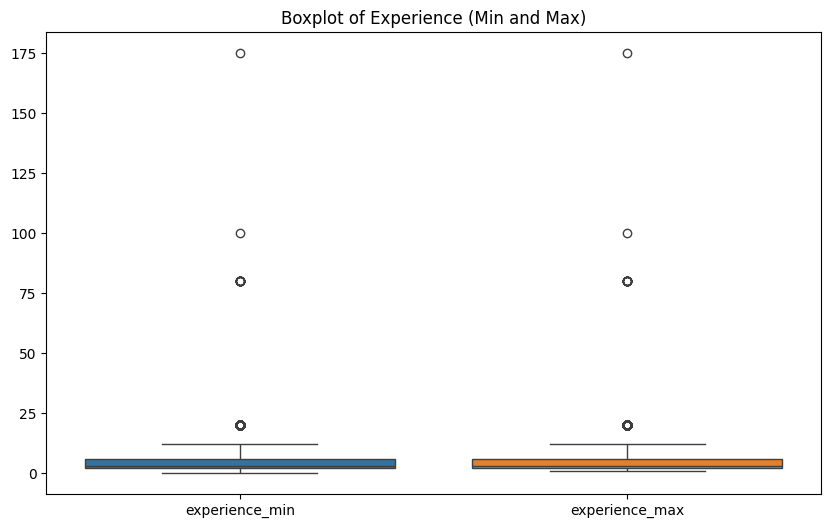

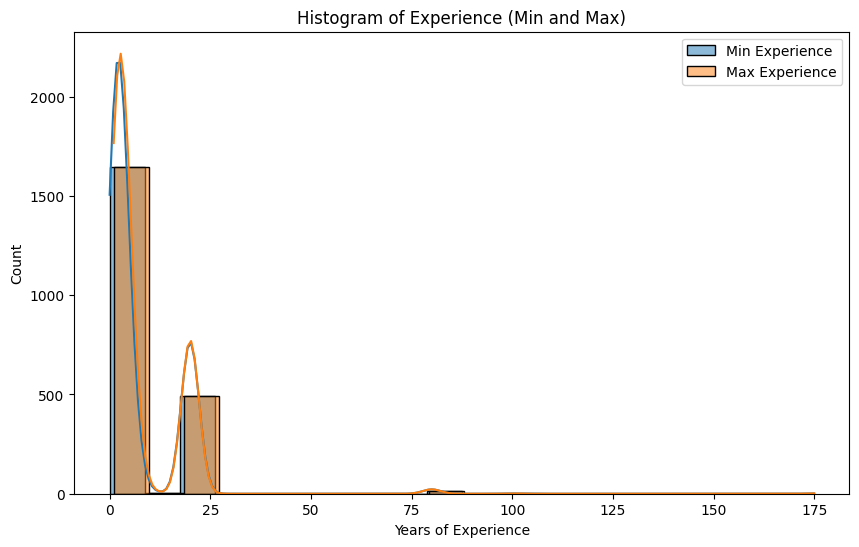

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df[['experience_min', 'experience_max']].describe())

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['experience_min', 'experience_max']])
plt.title('Boxplot of Experience (Min and Max)')
plt.show()

# Histogram to visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['experience_min'], bins=20, kde=True, label='Min Experience')
sns.histplot(df['experience_max'], bins=20, kde=True, label='Max Experience', alpha=0.5)
plt.title('Histogram of Experience (Min and Max)')
plt.xlabel('Years of Experience')
plt.legend()
plt.show()

In [ ]:
# Calculating median experience by job category
median_min_by_category = df.groupby('job_category')['experience_min'].median()
median_max_by_category = df.groupby('job_category')['experience_max'].median()

# Imputing missing values based on job category
df['experience_min'] = df.apply(
    lambda row: median_min_by_category[row['job_category']] if pd.isnull(row['experience_min']) else row['experience_min'],
    axis=1
)
df['experience_max'] = df.apply(
    lambda row: median_max_by_category[row['job_category']] if pd.isnull(row['experience_max']) else row['experience_max'],
    axis=1
)


# Defining reasonable bounds
lower_bound = 0
upper_bound = 20

# Cap outliers
df['experience_min'] = df['experience_min'].clip(lower=lower_bound, upper=upper_bound)
df['experience_max'] = df['experience_max'].clip(lower=lower_bound, upper=upper_bound)

## Exploratory Data Analysis

### Skill Analysis

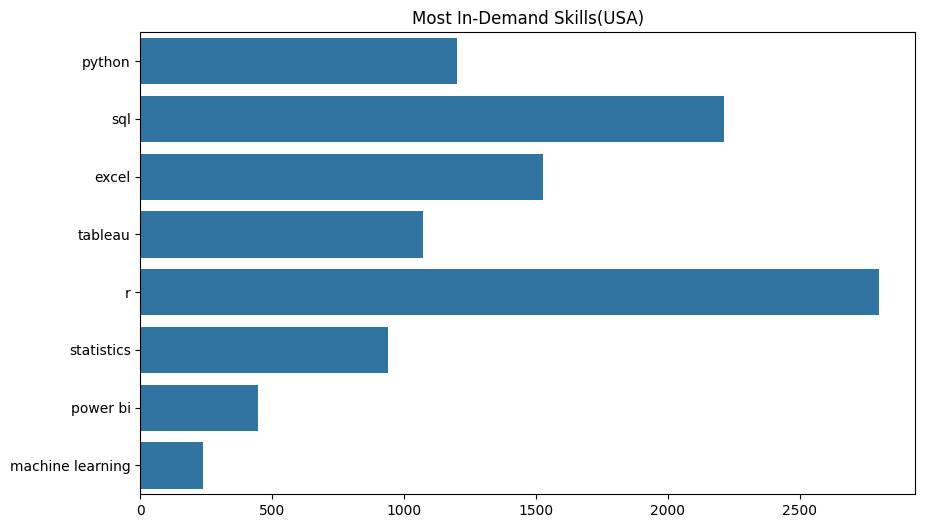

In [ ]:
from collections import Counter
import re

#Extracting common skills (e.g., Python, SQL, Excel)
skills_list = ['python', 'sql', 'excel', 'tableau', 'power bi', 'r', 'statistics', 'machine learning']
def extract_skills(description):
    description = description.lower()
    skills_found = [skill for skill in skills_list if skill in description]
    return skills_found

df['skills'] = df['description'].apply(extract_skills)

# Flatten the list of skills and count frequencies
all_skills = [skill for sublist in df['skills'] for skill in sublist]
skill_counts = Counter(all_skills)

# Visualizing top skills
plt.figure(figsize=(10, 6))
sns.barplot(x=list(skill_counts.values()), y=list(skill_counts.keys()))
plt.title('Most In-Demand Skills(USA)')
plt.show()

### Top Job Titles

title
Data Analyst                           2110
Data Analyst - Recent Graduate          183
Junior Data Analyst                     139
Data Analyst - (Remote - US)             62
Entry-Level Data Analyst                 37
Associate Data Analyst                   37
SQL Data Analyst                         37
Analyst, Data and Analytics              36
Analyst (Global Data and Analytics)      36
Analyst - Data Visualization             35
Name: count, dtype: int64


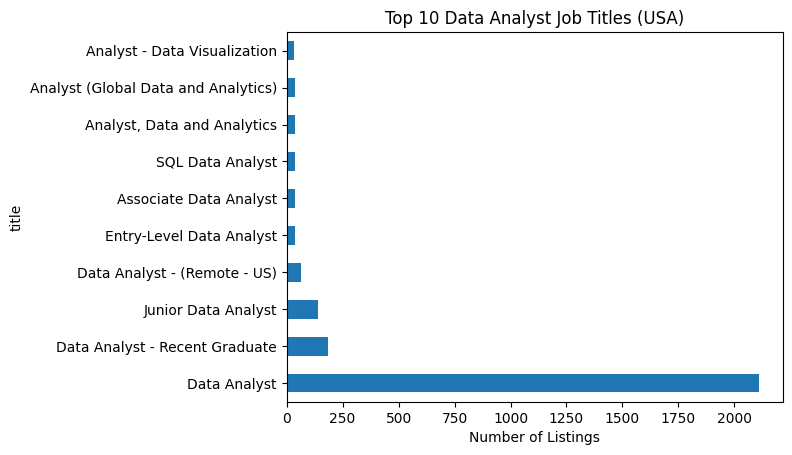

In [18]:
print(df['title'].value_counts().head(10))


import matplotlib.pyplot as plt
df['title'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Data Analyst Job Titles (USA)')
plt.xlabel('Number of Listings')
plt.show()



 Top Hiring Companies: 
 
company
PayPal                            499
Insight Global                     97
Agility Partners                   69
Mediavine                          62
The Walt Disney Company            60
Launch Consulting Group            38
London Approach                    38
Azenta Life Sciences               38
The Federal Savings Bank           37
Chicago Teachers' Pension Fund     37
Name: count, dtype: int64

 Top Locations: 

location
United States                      632
New York City Metropolitan Area    179
Chicago, IL                        153
New York, NY                       100
Austin, TX                          72
Texas, United States                67
Timonium, MD                        61
Dallas, TX                          55
Boston, MA                          54
Charlotte, NC                       41
Name: count, dtype: int64
onsite_remote
remote    970
onsite    950
hybrid    925
Name: count, dtype: int64


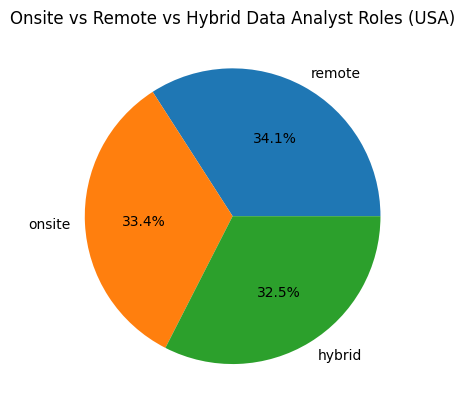

In [19]:
#Top Hiring companies
print("\n Top Hiring Companies: \n ")
print(df['company'].value_counts().head(10))


#Top Locations
print("\n Top Locations: \n")
print(df['location'].value_counts().head(10))

#Distribution of Onsite/remote/hybrid roles
print(df['onsite_remote'].value_counts())
df['onsite_remote'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Onsite vs Remote vs Hybrid Data Analyst Roles (USA)')
plt.ylabel('')
plt.show()



## Job Criteria and Description Analysis

In [ ]:
#Counting how many job descriptions mention 'python'
print("\n Number of Python Mentions")
df['has_python'] = df['description'].str.lower().str.contains('python')
print(df['has_python'].sum())

#Counting how many job descriptions mention "sql"
print("\n Number of SQL mentions")
df['has_sql'] = df['description'].str.lower().str.contains('sql')
print(df['has_sql'].sum())

#Counting how many job descriptions mention "excel"
print("\n Number of Excel mentions")
df['has_excel'] = df['description'].str.lower().str.contains('excel')
print(df['has_excel'].sum())

#Counting how many job descriptions mention "R"
print("\n Number of R mentions")
df['has_r'] = df['description'].str.lower().str.contains('r')
print(df['has_r'].sum())

from collections import Counter
import re

all_criteria = ' '.join(df['criteria'].dropna().tolist()).lower()
words = re.findall(r'\w+', all_criteria)
common_words = Counter(words).most_common(20)
print(common_words)



 Number of Python Mentions
1201

 Number of SQL mentions
2214

 Number of Excel mentions
1528

 Number of R mentions
2799
[('level', 4001), ('and', 3877), ('information', 2893), ('technology', 2890), ('employment', 2799), ('type', 2799), ('seniority', 2653), ('job', 2653), ('function', 2653), ('industries', 2652), ('full', 2144), ('time', 2144), ('services', 1646), ('it', 1270), ('mid', 855), ('senior', 855), ('consulting', 804), ('development', 774), ('software', 738), ('not', 705)]


C:\Users\PrinceAndyBabayi\AppData\Local\Temp\ipykernel_20324\3426383267.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('posted_date').resample('M').size().plot()


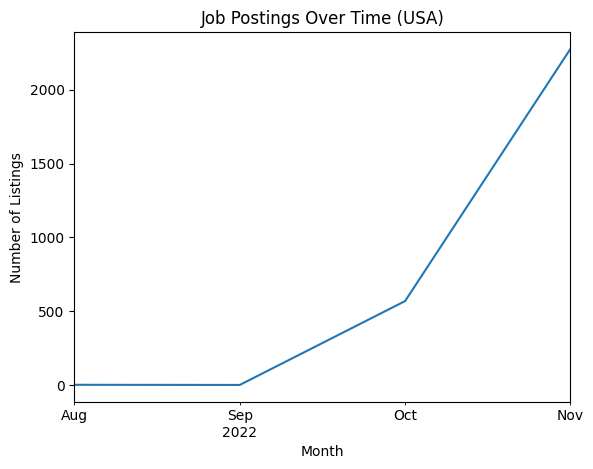

In [21]:
df['posted_date'] = pd.to_datetime(df['posted_date'])
df.set_index('posted_date').resample('M').size().plot()
plt.title('Job Postings Over Time (USA)')
plt.ylabel('Number of Listings')
plt.xlabel('Month')
plt.show()


### Experience By Job Category

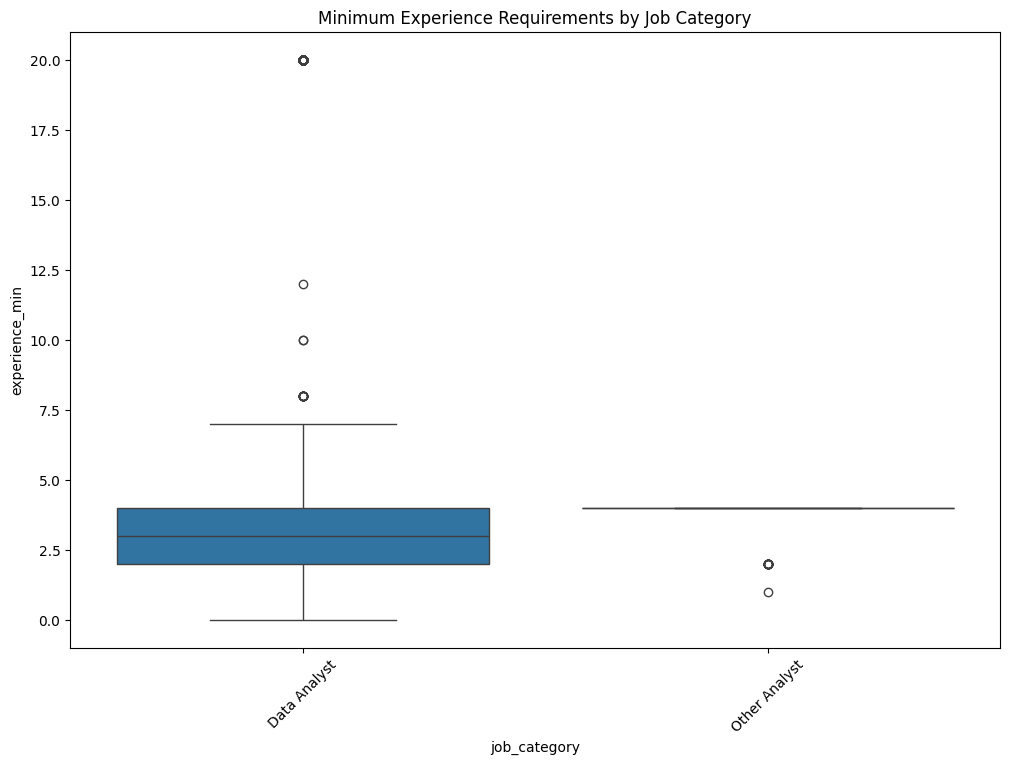

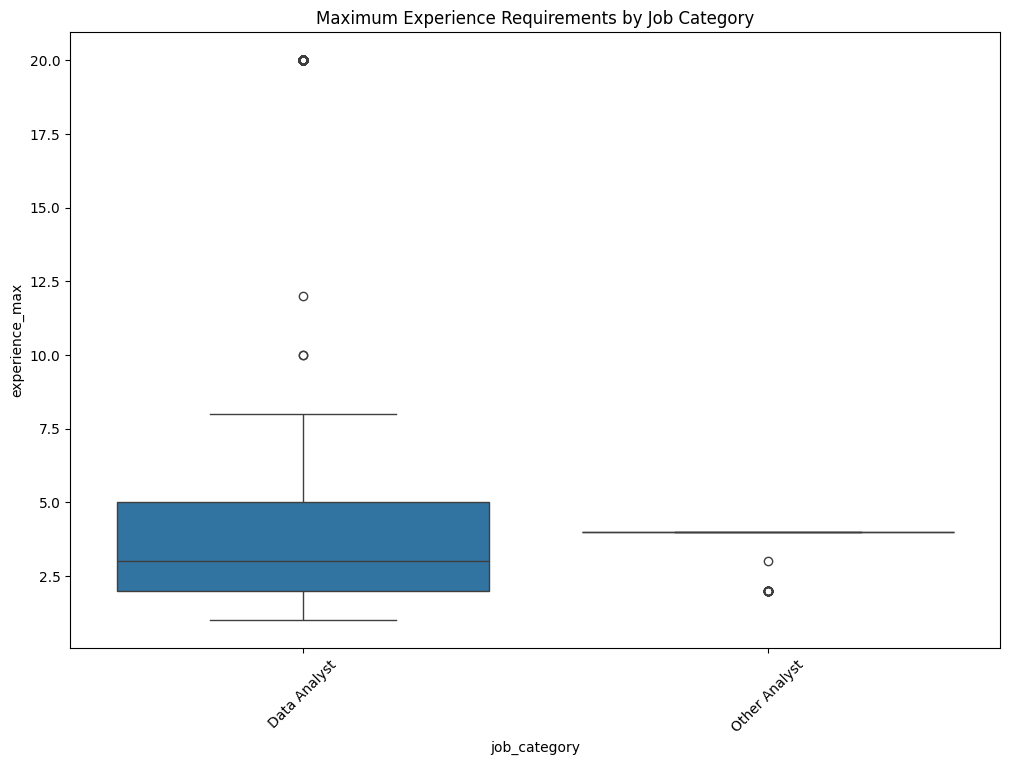

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='job_category', y='experience_min')
plt.title('Minimum Experience Requirements by Job Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='job_category', y='experience_max')
plt.title('Maximum Experience Requirements by Job Category')
plt.xticks(rotation=45)
plt.show()

### Distribution of Experience Requirements

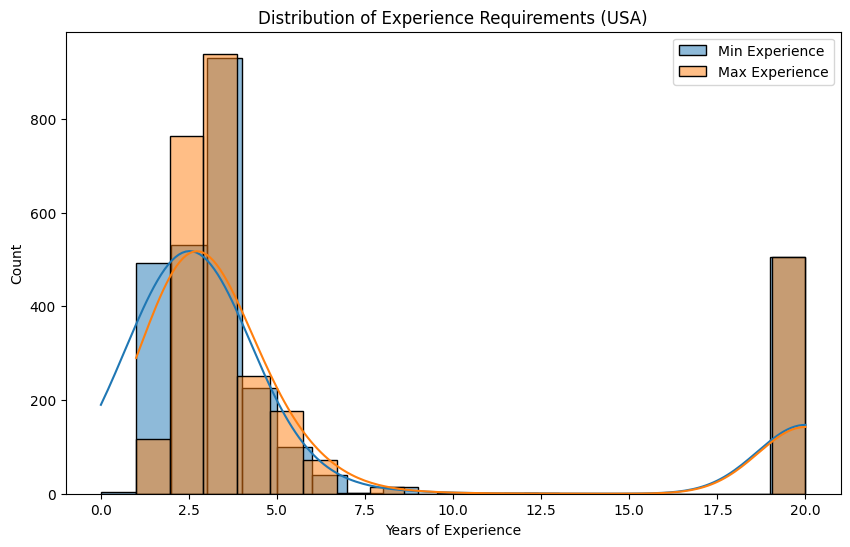

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['experience_min'], bins=20, kde=True, label='Min Experience')
sns.histplot(df['experience_max'], bins=20, kde=True, label='Max Experience', alpha=0.5)
plt.title('Distribution of Experience Requirements (USA)')
plt.xlabel('Years of Experience')
plt.legend()
plt.show()